# Storing Atomic Information

<div class="alert alert-info">
to run and analyse a molecular dynamics simulation we need data structures to allow us to store and use information about our system - atomic positions, types, velocities.

In this workbook we'll set up some methods using numpy and python arrays that can be used for this. 
    </div>

In [1]:
# load in the numpy library
import numpy as np

Storing a vector - could be an atoms position or velocity at an instant in time.

In [3]:
pos1 = np.array([0.0, 1.0, 2.0])

we can access the x, y and z components using `[]` syntax - it starts from `0` for `x`

In [4]:
print(pos1[0])

0.0


What if we have more than one atom? We can have a 2D array with the first index giving atom number and the second index the component:

In [5]:
## a 2D array has to have two sets of square brackets [[]] and the 'vectors' in the inner set are a comma separated list

atomspos = [
    [0,0,0],
    [0,0,1],
    [0,0,2],
    [0,0,3]
]
print(atomspos)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3]]


This is a python array - these can be appended to:

In [6]:
atomspos.append([0,0,4])
print(atomspos)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 0, 3], [0, 0, 4]]


To access an individual atom or component we use `[]` again:

In [7]:
print("the position vector of atom #1 is {}".format(atomspos[1]))

the position vector of atom #1 is [0, 0, 1]


In [8]:
# now update all our atom x positions - here just by a fixed amount
atomspos[:,0] += 0.1

TypeError: list indices must be integers or slices, not tuple

<div class="alert alert-danger">this doesn't work because it is a python array - we would need a for loop over all the atoms to do this - instead let's convert atomspos into a numpy array then this will 'just work'</div>

In [9]:
atomspos = np.array(atomspos)

In [10]:
atomspos[:,0] += 1
print(atomspos)

[[1 0 0]
 [1 0 1]
 [1 0 2]
 [1 0 3]
 [1 0 4]]


<div class="alert alert-danger">Note that numpy arrays are `typed` - as we gave them as integers python assumed that is what they should be. It will complain if we try to add a float</div>

In [11]:
atomspos[:,0] += 0.1

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

<div class="alert alert-warning">To avoid that use floats to start with or specify the type of the array you create (look it up give the dtype value when you create the nparray)</div>

# Trajectories

If we want to store data for multiple time steps we can use a python array and `append()` the new set of data to it:

In [12]:
mytrajectory = []
mytrajectory.append([atomspos])
print(mytrajectory)

[[array([[1, 0, 0],
       [1, 0, 1],
       [1, 0, 2],
       [1, 0, 3],
       [1, 0, 4]])]]


In [13]:
atomspos[:,0] += 1
mytrajectory.append([atomspos])
print(mytrajectory)

[[array([[2, 0, 0],
       [2, 0, 1],
       [2, 0, 2],
       [2, 0, 3],
       [2, 0, 4]])], [array([[2, 0, 0],
       [2, 0, 1],
       [2, 0, 2],
       [2, 0, 3],
       [2, 0, 4]])]]


In [14]:
atomspos[:,0] += 1
mytrajectory.append([atomspos])
print(mytrajectory)

[[array([[3, 0, 0],
       [3, 0, 1],
       [3, 0, 2],
       [3, 0, 3],
       [3, 0, 4]])], [array([[3, 0, 0],
       [3, 0, 1],
       [3, 0, 2],
       [3, 0, 3],
       [3, 0, 4]])], [array([[3, 0, 0],
       [3, 0, 1],
       [3, 0, 2],
       [3, 0, 3],
       [3, 0, 4]])]]


<div class="alert alert-danger">Oh no! All the data are the same! We need to append a copy of our atomspos data. By default we pass a reference to **the same data** each time!</div>

### Let's try again
this time we'll make the data floating point and a numpy array straight away:

In [83]:
mytrajectory = []
atomspos = np.array([
    [0,0,0],
    [0,0,1],
    [0,0,2],
    [0,0,3]
], dtype='float64')
atomspos

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 2.],
       [0., 0., 3.]])

now we'll use a loop to fill in ten 'steps'

In [85]:
for t in range(100000):
    mytrajectory.append(np.copy(atomspos))
    mu = 0
    sigma = 0.5
    atomspos[:,0] += np.random.normal(mu, sigma, 4)
    #atomspos[:,0] += np.random.random()
#print(mytrajectory)

<div class="alert alert-success">
Hurrah. That works! Now we have all the data and can access it using 3 indices `[timestep, atom, component]`
</div>
<div class="alert alert-warning"> 
    But let's convert the trajectory to a numpy array beforehand (we don't do this in the beginning as you can't append to a numpy array )
    </div>

In [86]:
mytrajectory = np.array(mytrajectory)

In [90]:
# get all the time data (: is shorthand for this) and then select atom 0 and component 0
xcompofatom0 = mytrajectory[:,1,0] 

In [91]:
import matplotlib.pyplot as plt

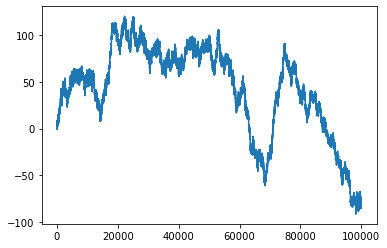

In [92]:
plt.plot(xcompofatom0);

# That's it

we'll use this to store data in the full MD code.
Once the data is in a numpy array we can measure things like RMSD, distributions of velocities etc using standard python / numpy commands. 

In [ ]:
np.random.random()

In [3]:
coords = np.zeros((100,3))
coords

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

array([[  0. ,   0. ,   0. ],
       [  0. ,   0. ,   1.2],
       [  0. ,   0. ,   2.4],
       [  0. ,   0. ,   3.6],
       [  0. ,   0. ,   4.8],
       [  0. ,   0. ,   6. ],
       [  0. ,   0. ,   7.2],
       [  0. ,   0. ,   8.4],
       [  0. ,   0. ,   9.6],
       [  0. ,   0. ,  10.8],
       [  0. ,   0. ,  12. ],
       [  0. ,   0. ,  13.2],
       [  0. ,   0. ,  14.4],
       [  0. ,   0. ,  15.6],
       [  0. ,   0. ,  16.8],
       [  0. ,   0. ,  18. ],
       [  0. ,   0. ,  19.2],
       [  0. ,   0. ,  20.4],
       [  0. ,   0. ,  21.6],
       [  0. ,   0. ,  22.8],
       [  0. ,   0. ,  24. ],
       [  0. ,   0. ,  25.2],
       [  0. ,   0. ,  26.4],
       [  0. ,   0. ,  27.6],
       [  0. ,   0. ,  28.8],
       [  0. ,   0. ,  30. ],
       [  0. ,   0. ,  31.2],
       [  0. ,   0. ,  32.4],
       [  0. ,   0. ,  33.6],
       [  0. ,   0. ,  34.8],
       [  0. ,   0. ,  36. ],
       [  0. ,   0. ,  37.2],
       [  0. ,   0. ,  38.4],
       [  